## Import libraries

In [34]:
# Import libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import datasets

Here we will import the datasets to our notebook. 

In [35]:
# grab the datasets

url20 = "https://zenodo.org/records/8303397/files/full_data_20.csv?download=1"
url60 = "https://zenodo.org/records/8303397/files/full_data_60.csv?download=1"


gamesAt20 = pd.read_csv(url20 , sep=',')
gamesAt60 = pd.read_csv(url60 , sep=',')

## Check that the datasets imported properly

In [36]:
gamesAt20

,Unnamed: 0,matchID,fullTimeMS,timePercent,blueChampionKill,blueFirstBlood,blueDragonKill,blueDragonHextechKill,blueDragonChemtechKill,blueDragonFireKill,...,redDragonElderKill,redRiftHeraldKill,redBaronKill,redTowerKill,redInhibitorKill,redTotalGold,redMinionsKilled,redJungleMinionsKilled,redAvgPlayerLevel,redWin
0,0,BR1_2720891721,2092233,6,5,True,0,0,0,0,...,0,0,0,0,0,8014,57,30,4.2,False
1,1,BR1_2720337066,1867984,6,1,False,0,0,0,0,...,0,0,0,0,0,9018,91,40,4.8,True
2,2,BR1_2720218416,2396948,7,3,False,0,0,0,0,...,0,0,0,0,0,9085,94,36,5.0,False
3,3,BR1_2720199652,1656791,5,2,True,0,0,0,0,...,0,0,0,0,0,7220,91,20,4.4,False
4,4,BR1_2720058177,1875549,6,2,False,0,0,0,0,...,0,0,0,0,0,10378,83,36,4.8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64551,16558,BR1_2720967880,1688653,5,1,False,0,0,0,0,...,0,0,0,0,0,7973,96,32,4.4,False
64552,16559,BR1_2731950687,1235453,4,0,False,0,0,0,0,...,0,0,0,0,0,6094,60,24,3.6,False
64553,16560,BR1_2731932982,1604355,5,3,True,0,0,0,0,...,0,0,0,0,0,6938,86,28,4.2,False
64554,16561,BR1_2731920865,1689825,5,1,False,0,0,0,0,...,0,0,0,0,0,9517,86,32,4.4,True


## Lets verify that all the data is present and that we have no missing values

In [37]:
gamesAt20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64556 entries, 0 to 64555
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               64556 non-null  int64  
 1   matchID                  64556 non-null  object 
 2   fullTimeMS               64556 non-null  int64  
 3   timePercent              64556 non-null  int64  
 4   blueChampionKill         64556 non-null  int64  
 5   blueFirstBlood           64556 non-null  bool   
 6   blueDragonKill           64556 non-null  int64  
 7   blueDragonHextechKill    64556 non-null  int64  
 8   blueDragonChemtechKill   64556 non-null  int64  
 9   blueDragonFireKill       64556 non-null  int64  
 10  blueDragonAirKill        64556 non-null  int64  
 11  blueDragonEarthKill      64556 non-null  int64  
 12  blueDragonWaterKill      64556 non-null  int64  
 13  blueDragonElderKill      64556 non-null  int64  
 14  blueRiftHeraldKill    

In [38]:
gamesAt20.isna().sum()


Unnamed: 0                 0
matchID                    0
fullTimeMS                 0
timePercent                0
blueChampionKill           0
blueFirstBlood             0
blueDragonKill             0
blueDragonHextechKill      0
blueDragonChemtechKill     0
blueDragonFireKill         0
blueDragonAirKill          0
blueDragonEarthKill        0
blueDragonWaterKill        0
blueDragonElderKill        0
blueRiftHeraldKill         0
blueBaronKill              0
blueTowerKill              0
blueInhibitorKill          0
blueTotalGold              0
blueMinionsKilled          0
blueJungleMinionsKilled    0
blueAvgPlayerLevel         0
blueWin                    0
redChampionKill            0
redFirstBlood              0
redDragonKill              0
redDragonHextechKill       0
redDragonChemtechKill      0
redDragonFireKill          0
redDragonAirKill           0
redDragonEarthKill         0
redDragonWaterKill         0
redDragonElderKill         0
redRiftHeraldKill          0
redBaronKill  

In [39]:
(gamesAt20.values == '?').sum()

0

## Graph the data

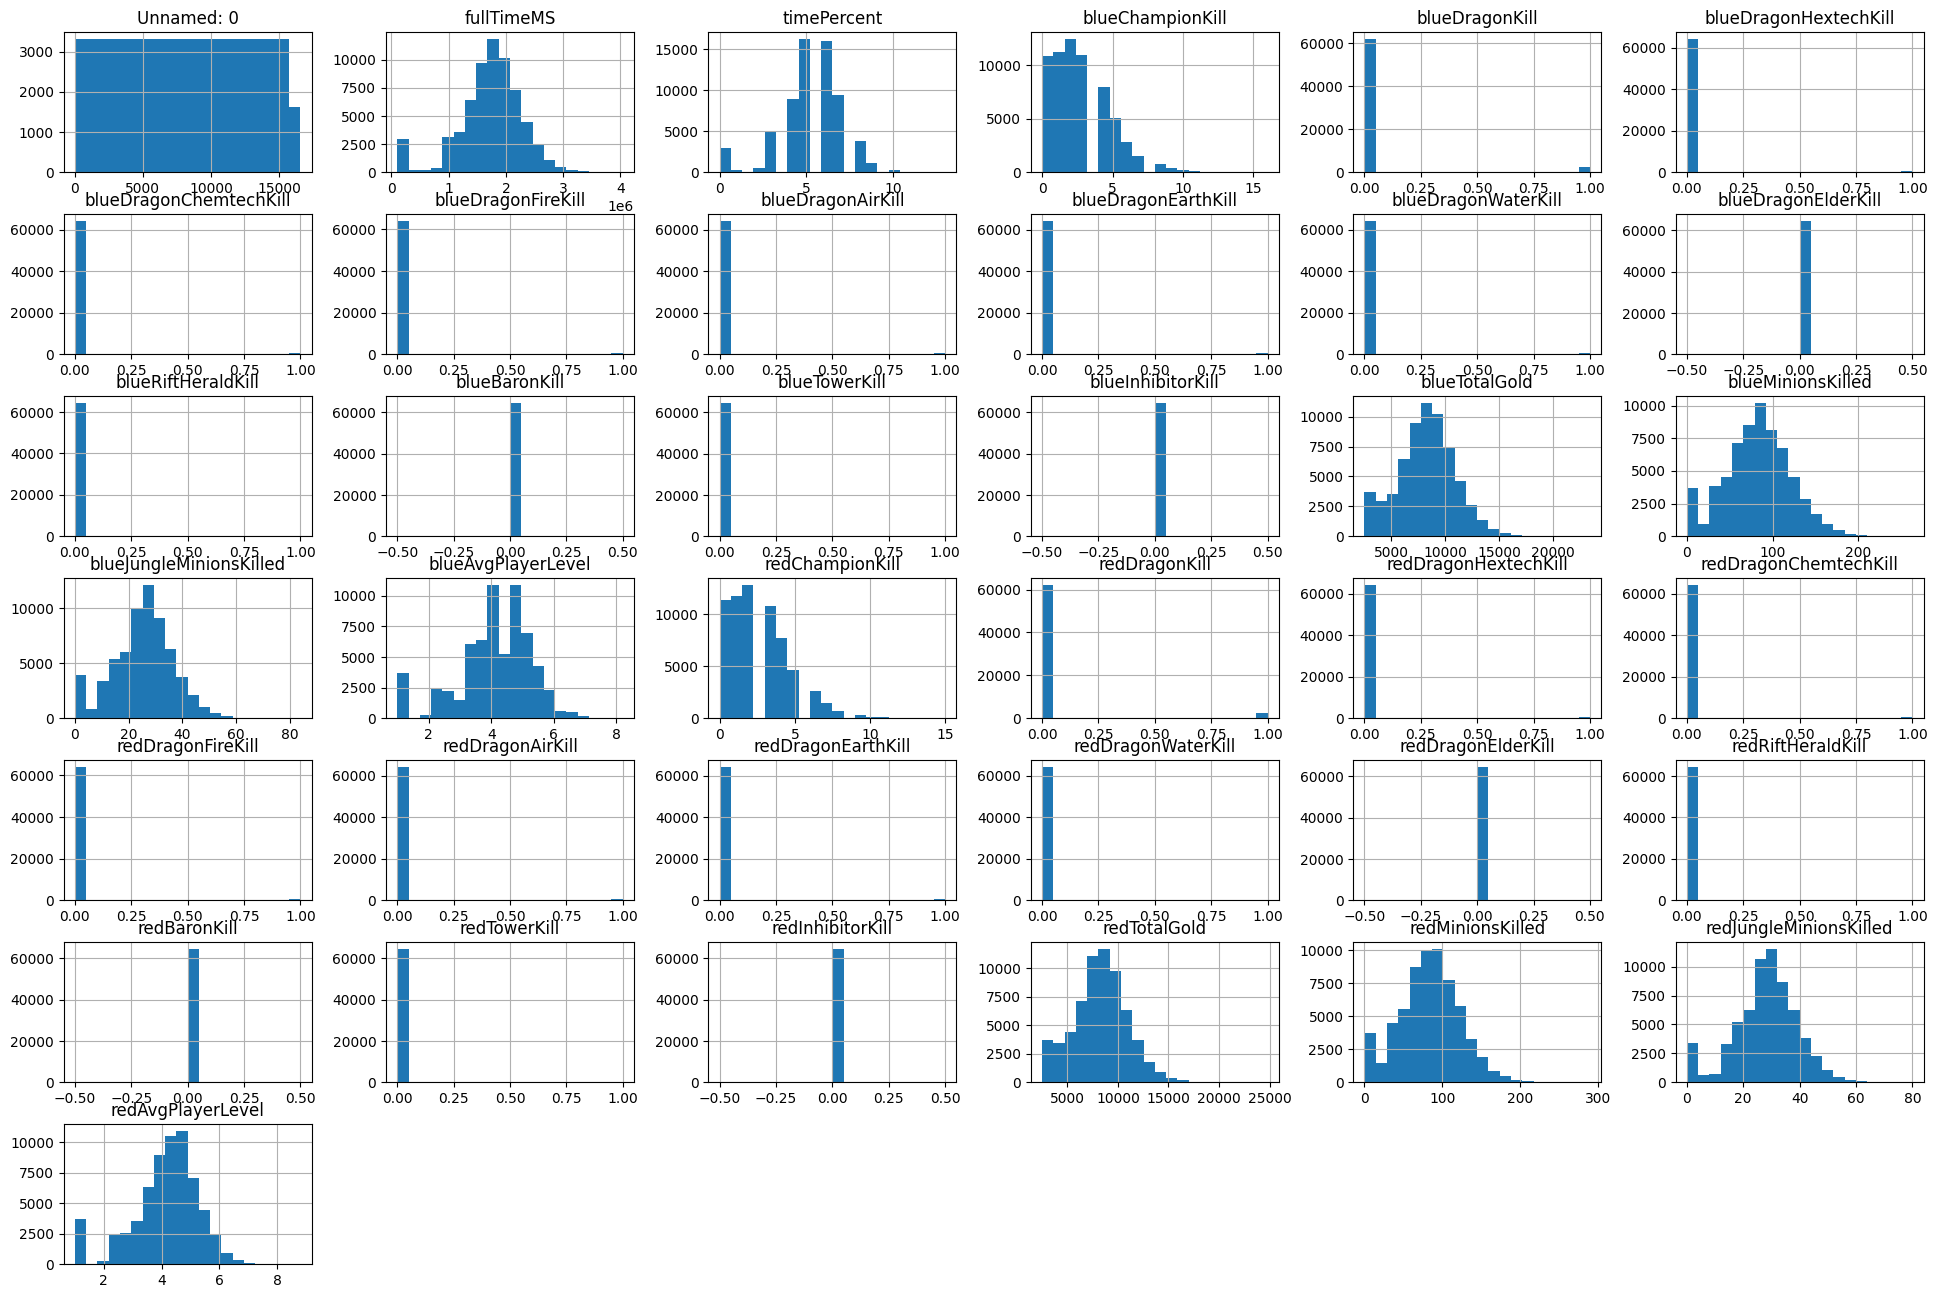

In [40]:
gamesAt20.hist(bins = 20 , figsize=(24 , 16))
plt.show()

# Clean the data

## Remove redundant columns

Boolean columns like red/blue first blood and red/blue win are boolean and redundant, if one is true for red then it must be false for blue.
Moving forward we will drop red team boolean variables

we also don't care about matchID and unnamed. We believe unnamed is just a counter, but whatever it is we do not need it.

Furthermore since we are only at 20% of the game it is nearly impossible that inhibitors and towers have been destroyed, therefore we can safely remove them.
More features we can safely remove are baron kills and elder kills since baron spawns at 20 minutes, and the elder dragon spawns 5 minutes after one team has claimed 4 dragons, and each dragon is on a 5 minute respawn timer. This means that at a minimum it takes 25 minutes for elder to spawn. For these values to be greater than 0 that means the game must last for over 100 minutes, and since the average game time is 25-45 minutes the 100 minute+ game is a clear outlier that we can discard.

It should be noted that these assertions are only valid for the game at 20%, as the game progresses these features become more important, and at late stages can decide the outcome of the game.

In [41]:
# convert blue team's boolean variables to ints

gamesAt20['blueFirstBlood'] = gamesAt20['blueFirstBlood'].astype(int)
gamesAt20['blueWin'] = gamesAt20['blueWin'].astype(int)

In [42]:
# cut unused columns

gamesAt20.drop(labels=['Unnamed: 0' , 'matchID' , 'redFirstBlood' , 'redWin'] , axis=1 , inplace=True)
gamesAt20.drop(labels=['blueBaronKill' , 'redBaronKill' , 'blueTowerKill' , 'redTowerKill' , 'blueDragonElderKill' , 'redDragonElderKill' , 'blueInhibitorKill' , 'redInhibitorKill'] , axis=1 , inplace=True)

In [43]:
gamesAt20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64556 entries, 0 to 64555
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fullTimeMS               64556 non-null  int64  
 1   timePercent              64556 non-null  int64  
 2   blueChampionKill         64556 non-null  int64  
 3   blueFirstBlood           64556 non-null  int32  
 4   blueDragonKill           64556 non-null  int64  
 5   blueDragonHextechKill    64556 non-null  int64  
 6   blueDragonChemtechKill   64556 non-null  int64  
 7   blueDragonFireKill       64556 non-null  int64  
 8   blueDragonAirKill        64556 non-null  int64  
 9   blueDragonEarthKill      64556 non-null  int64  
 10  blueDragonWaterKill      64556 non-null  int64  
 11  blueRiftHeraldKill       64556 non-null  int64  
 12  blueTotalGold            64556 non-null  int64  
 13  blueMinionsKilled        64556 non-null  int64  
 14  blueJungleMinionsKille

## Let's show how much each feature affects the game outcome

To do this we will simply compare if each team that got an objective won or not

### Let's show the impact that first objective has

In [44]:

# lets look at how many games blue team wins when they get the dragon or rift herald

blue_wins = gamesAt20[gamesAt20['blueWin'] == 1]
blue_wins_obj = blue_wins[(blue_wins['blueDragonKill'] > 0) | (blue_wins['blueRiftHeraldKill'] > 0)].shape[0]

# lets look at how many games red team wins when they get the dragon or rift herald

red_wins = gamesAt20[gamesAt20['blueWin'] == 0]
red_wins_obj = red_wins[(red_wins['redDragonKill'] > 0) | (red_wins['redRiftHeraldKill'] > 0)].shape[0]

print("blue wins: " + str(blue_wins.shape[0]))
print("blue wins with 1st obj: " + str(blue_wins_obj))
print("% won: " + str(blue_wins_obj / blue_wins.shape[0]))

print("red wins: " + str(red_wins.shape[0]))
print("red wins with 1st obj: " + str(red_wins_obj))
print("% won: " + str(red_wins_obj / red_wins.shape[0]))

blue wins: 32595
blue wins with 1st obj: 1395
% won: 0.042797975149562816
red wins: 31961
red wins with 1st obj: 1399
% won: 0.04377209724351554


This tells us that 1st objective has almost zero impact on the outcome of the game. From this we can also safely drop the features specifying the type of dragon since the overall has such a low impact, the features specifying dragon type would only have a lower percentage.

### Let's remove the neutral objective features

In [61]:
gamesAt20.drop(labels=['blueDragonKill' , 'blueDragonHextechKill' , 'blueDragonChemtechKill' , 'blueDragonFireKill' , 'blueDragonAirKill' , 'blueDragonEarthKill' , 'blueDragonWaterKill' , 'blueRiftHeraldKill'] , axis=1 , inplace=True)
gamesAt20.drop(labels=['redDragonKill' , 'redDragonHextechKill' , 'redDragonChemtechKill' , 'redDragonFireKill' , 'redDragonAirKill' , 'redDragonEarthKill' , 'redDragonWaterKill' , 'redRiftHeraldKill'] , axis=1 , inplace=True)

### Let's show the impact that first bloods have

In [45]:
# we can resuse the blue_wins and red_wins dataframes

blue_wins_FB = blue_wins[blue_wins['blueFirstBlood'] == 1].shape[0]
red_wins_FB = red_wins[red_wins['blueFirstBlood'] == 0].shape[0]

print("blue wins: " + str(blue_wins.shape[0]))
print("blue wins with 1st blood: " + str(blue_wins_FB))
print("% won: " + str(blue_wins_FB / blue_wins.shape[0]))

print("red wins: " + str(red_wins.shape[0]))
print("red wins with 1st blood: " + str(red_wins_FB))
print("% won: " + str(red_wins_FB / red_wins.shape[0]))

blue wins: 32595
blue wins with 1st blood: 17206
% won: 0.5278723730633533
red wins: 31961
red wins with 1st blood: 19377
% won: 0.6062701417352399


### Let's show the impact of early game  gold

In [49]:
blue_wins_GL = gamesAt20[(gamesAt20['blueTotalGold'] > gamesAt20['redTotalGold']) & (gamesAt20['blueWin'] == 1)].shape[0]
red_wins_GL = gamesAt20[(gamesAt20['redTotalGold'] > gamesAt20['blueTotalGold']) & (gamesAt20['blueWin'] == 0)].shape[0]

print("blue wins: " + str(blue_wins.shape[0]))
print("blue wins with more gold: " + str(blue_wins_GL))
print("% won: " + str(blue_wins_GL / blue_wins.shape[0]))

print("red wins: " + str(red_wins.shape[0]))
print("red wins with more gold: " + str(red_wins_GL))
print("% won: " + str(red_wins_GL / red_wins.shape[0]))

blue wins: 32595
blue wins with more gold: 19309
% won: 0.5923914710845222
red wins: 31961
red wins with more gold: 18775
% won: 0.5874346860235913


### Let's show the impact that junglers have in the early game

In [52]:
blue_wins_Jg_lead = gamesAt20[(gamesAt20['blueJungleMinionsKilled'] > gamesAt20['redJungleMinionsKilled']) & (gamesAt20['blueWin'] == 1)].shape[0]
red_wins_Jg_lead = gamesAt20[(gamesAt20['redJungleMinionsKilled'] > gamesAt20['blueJungleMinionsKilled']) & (gamesAt20['blueWin'] == 0)].shape[0]

print("blue wins: " + str(blue_wins.shape[0]))
print("blue wins with more jungle minions killed: " + str(blue_wins_Jg_lead))
print("% won: " + str(blue_wins_Jg_lead / blue_wins.shape[0]))

print("red wins: " + str(red_wins.shape[0]))
print("red wins with more jungle minions killed: " + str(red_wins_Jg_lead))
print("% won: " + str(red_wins_Jg_lead / red_wins.shape[0]))

blue wins: 32595
blue wins with more jungle minions killed: 13212
% won: 0.4053382420616659
red wins: 31961
red wins with more jungle minions killed: 14372
% won: 0.4496730390163011


### Let's show the impact of early game lane minion numbers

In [55]:
blue_wins_LM = blue_wins[(blue_wins['blueMinionsKilled'] > blue_wins['redMinionsKilled'])].shape[0]
red_wins_LM = red_wins[(red_wins['redMinionsKilled'] > red_wins['blueMinionsKilled'])].shape[0]

print("blue wins: " + str(blue_wins.shape[0])) 
print("blue wins with more minions killed: " + str(blue_wins_LM))
print("% won: " + str(blue_wins_LM / blue_wins.shape[0]))

print("red wins: " + str(red_wins.shape[0]))
print("red wins with more minions killed: " + str(red_wins_LM))
print("% won: " + str(red_wins_LM / red_wins.shape[0]))

blue wins: 32595
blue wins with more minions killed: 16642
% won: 0.510569105691057
red wins: 31961
red wins with more minions killed: 17458
% won: 0.5462282156378085


### Let's show the impact of early game kills

In [57]:
blue_wins_K = blue_wins[(blue_wins['blueChampionKill'] > blue_wins['redChampionKill'])].shape[0]
red_wins_K = red_wins[(red_wins['redChampionKill'] > red_wins['blueChampionKill'])].shape[0]

print("blue wins: " + str(blue_wins.shape[0]))
print("blue wins with more kills: " + str(blue_wins_K))
print("% won: " + str(blue_wins_K / blue_wins.shape[0]))

print("red wins: " + str(red_wins.shape[0]))
print("red wins with more kills: " + str(red_wins_K))
print("% won: " + str(red_wins_K / red_wins.shape[0]))

blue wins: 32595
blue wins with more kills: 15761
% won: 0.4835404203098635
red wins: 31961
red wins with more kills: 14408
% won: 0.45079941178311067


### Let's show the impact of early game level leads

In [59]:
blue_wins_LL = blue_wins[(blue_wins['blueAvgPlayerLevel'] > blue_wins['redAvgPlayerLevel'])].shape[0]
red_wins_LL = red_wins[(red_wins['redAvgPlayerLevel'] > red_wins['blueAvgPlayerLevel'])].shape[0]

print("blue wins: " + str(blue_wins.shape[0]))
print("blue wins with higher avg player level: " + str(blue_wins_LL))
print("% won: " + str(blue_wins_LL / blue_wins.shape[0]))

print("red wins: " + str(red_wins.shape[0]))
print("red wins with higher avg player level: " + str(red_wins_LL))
print("% won: " + str(red_wins_LL / red_wins.shape[0]))

blue wins: 32595
blue wins with higher avg player level: 12896
% won: 0.39564350360484735
red wins: 31961
red wins with higher avg player level: 13592
% won: 0.42526829573542757


### Remakes

Remakes are games that "don't get played" usually this is the case a player is AFK(away from keyboard), these games are junk data that we need to remove.
There are two ways to detect and remove these games:
 - drop all games where blue gold is equal to red gold, this will remove almost 3000 entries but it will not catch all the junk games
 - drop all games that do not meet a minimum time played, this will remove all the junk games but we must pick our cutoff time carefully as to not drop usable data

We will use a combination of both, first we will drop all games where the gold is identical. By dropping all games where the gold is identical we can remove the majority of junk games. Yes, it is possible for both teams to have the same gold in a non-remake game, however this could only ever happen for a split second and since this dataset is taken a a fixed 20% through the game the chance of that occurring is so infinitely small it's not worth considering.

The cutoff time will be set at 6 minutes, at about 6

In [74]:
# remove all games where blue team gold and red team gold are equal

gamesAt20.drop(gamesAt20[gamesAt20['blueTotalGold'] == gamesAt20['redTotalGold']].index , inplace=True)

# remove all games that last less than 15 minutes



### Remakes cont.

In order to decide on a cutoff time we will look at the number of games that last less than 15 minutes to games that last less than 20 minutes. We want our cutoff to be close to 15 minutes since this is where the 1st FF vote can begin at.

In [93]:
num_remakes_15 = gamesAt20[gamesAt20['fullTimeMin'] < 15].shape[0]
num_remakes_16 = gamesAt20[(gamesAt20['fullTimeMin'] < 16) & (gamesAt20['fullTimeMin'] > 15)].shape[0]
num_remakes_16_to_17 = gamesAt20[(gamesAt20['fullTimeMin'] < 17) & (gamesAt20['fullTimeMin'] >= 16)].shape[0]
num_remakes_17_to_18 = gamesAt20[(gamesAt20['fullTimeMin'] < 18) & (gamesAt20['fullTimeMin'] >= 17)].shape[0]
num_remakes_18_to_19 = gamesAt20[(gamesAt20['fullTimeMin'] < 19) & (gamesAt20['fullTimeMin'] >= 18)].shape[0]
num_remakes_19_to_20 = gamesAt20[(gamesAt20['fullTimeMin'] < 20) & (gamesAt20['fullTimeMin'] >= 19)].shape[0]
num_remakes_20_to_21 = gamesAt20[(gamesAt20['fullTimeMin'] < 21) & (gamesAt20['fullTimeMin'] >= 20)].shape[0]
num_remakes_21_to_22 = gamesAt20[(gamesAt20['fullTimeMin'] < 22) & (gamesAt20['fullTimeMin'] >= 21)].shape[0]
num_remakes_22_to_23 = gamesAt20[(gamesAt20['fullTimeMin'] < 23) & (gamesAt20['fullTimeMin'] >= 22)].shape[0]
num_remakes_23_to_24 = gamesAt20[(gamesAt20['fullTimeMin'] < 24) & (gamesAt20['fullTimeMin'] >= 23)].shape[0]
num_remakes_24_to_25 = gamesAt20[(gamesAt20['fullTimeMin'] < 25) & (gamesAt20['fullTimeMin'] >= 24)].shape[0]



print(num_remakes_15)
print(num_remakes_16)
print(num_remakes_16_to_17)
print(num_remakes_17_to_18)
print(num_remakes_18_to_19)
print(num_remakes_19_to_20)
print(num_remakes_20_to_21)
print(num_remakes_21_to_22)
print(num_remakes_22_to_23)
print(num_remakes_23_to_24)
print(num_remakes_24_to_25)

# notice from 15 to 16 minutes there is over 2x increase in games ending, so we will remove all games that last less than 16 minutes since this is a FF

623
1594
892
542
798
1062
1303
1335
1695
2228
2392


notice how from 15 minutes to 16 minutes there is a massive spike in games ending (due to FF), the numbers calm down for a while before increasing again steadily, using this information we can deduce that the 15-16 minute spike is abnormal and we can safely remove it.

__do a graph comparison of game times__

In [75]:
# add a column for the game time in minutes (for easier analysis)

gamesAt20['fullTimeMin'] = gamesAt20['fullTimeMS'] / 60000
gamesAt20

,fullTimeMS,timePercent,blueChampionKill,blueFirstBlood,blueTotalGold,blueMinionsKilled,blueJungleMinionsKilled,blueAvgPlayerLevel,blueWin,redChampionKill,redTotalGold,redMinionsKilled,redJungleMinionsKilled,redAvgPlayerLevel,fullTimeMin
0,2092233,6,5,1,9299,85,24,4.6,1,3,8014,57,30,4.2,34.870550
1,1867984,6,1,0,7846,82,32,4.4,0,3,9018,91,40,4.8,31.133067
2,2396948,7,3,0,10890,122,40,5.2,1,1,9085,94,36,5.0,39.949133
3,1656791,5,2,1,8073,89,28,4.2,1,1,7220,91,20,4.4,27.613183
4,1875549,6,2,0,8438,92,28,4.4,0,5,10378,83,36,4.8,31.259150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64551,1688653,5,1,0,7800,85,32,4.2,1,1,7973,96,32,4.4,28.144217
64552,1235453,4,0,0,5832,62,28,3.4,1,1,6094,60,24,3.6,20.590883
64553,1604355,5,3,1,8600,98,28,4.2,1,0,6938,86,28,4.2,26.739250
64554,1689825,5,1,0,7291,90,16,4.0,0,6,9517,86,32,4.4,28.163750


In [86]:
print(gamesAt20['fullTimeMin'].describe())

num_games_over_60_min = gamesAt20[gamesAt20['fullTimeMin'] > 60].shape[0]
num_remakes_15 = gamesAt20[gamesAt20['fullTimeMin'] < 15].shape[0]
num_remakes_16 = gamesAt20[gamesAt20['fullTimeMin'] < 16].shape[0]
print(num_games_over_60_min)
print(num_remakes_15)
print(num_remakes_16)

# notice from 15 to 16 minutes there is over 2x increase in games ending, so we will remove all games that last less than 16 minutes since this is a FF

count    61434.000000
mean        30.075190
std          7.420626
min          5.129733
25%         25.322908
50%         30.008700
75%         34.747671
max         67.351000
Name: fullTimeMin, dtype: float64
17
623
2217


In [77]:
games_less_than_5_min = gamesAt20[gamesAt20['fullTimeMin'] < 5]
games_less_than_5_min

,fullTimeMS,timePercent,blueChampionKill,blueFirstBlood,blueTotalGold,blueMinionsKilled,blueJungleMinionsKilled,blueAvgPlayerLevel,blueWin,redChampionKill,redTotalGold,redMinionsKilled,redJungleMinionsKilled,redAvgPlayerLevel,fullTimeMin


In [78]:
games_equal_gold = gamesAt20[gamesAt20['redTotalGold'] == gamesAt20['blueTotalGold']]
games_equal_gold

,fullTimeMS,timePercent,blueChampionKill,blueFirstBlood,blueTotalGold,blueMinionsKilled,blueJungleMinionsKilled,blueAvgPlayerLevel,blueWin,redChampionKill,redTotalGold,redMinionsKilled,redJungleMinionsKilled,redAvgPlayerLevel,fullTimeMin
